In [ ]:
pip install openai

In [ ]:
pip install pandasql

# Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas.tseries.offsets import QuarterBegin


import requests
from io import StringIO

from openai import OpenAI
from google.colab import drive
import pandasql as psql

import re
import ast



# Initialize openai API
drive.mount('/content/drive')



Mounted at /content/drive


# Load in time series dataset



In [5]:
file_id = '1WVpJRZ8Hr9cp9zUgfC1OWDa4udDDTk3E'
url = f'https://drive.google.com/uc?id={file_id}'

response = requests.get(url)
csv_content = response.content.decode('utf-8')

# Use StringIO to read the CSV content into a DataFrame
data_ts = pd.read_csv(StringIO(csv_content))
data_ts

,day_begin,line_of_business,product,segment,vertical,objective,region,metric_category_group,metric_value_num,metric_value_den
0,2023-03-24,LMS,OTHER,ESG,NaN,WEBSITE_VISIT,NaN,eCPM,20721511.0,11918003.0
1,2023-10-13,LMS,LAN,ESG,Retail,BRAND_AWARENESS,NAMER,Net Bookings (C$),11188.0,NaN
2,2023-07-06,LMS,OTHER,ESG,Professional Services,BRAND_AWARENESS,NAMER,Budget Utilization,28395.0,26389.0
3,2023-04-28,LMS,OTHER,ESG,Media,WEBSITE_VISIT,EMEAL,Budget Utilization,8181.0,7432.0
4,2024-01-15,LMS,OTHER,ESG,Professional Services,WEBSITE_VISIT,NAMER,Budgets,84368.0,NaN
...,...,...,...,...,...,...,...,...,...,...
946961,2023-12-30,LMS,OTHER,ESG,NaN,BRAND_AWARENESS,NaN,LAN Revenue Adoption,153748.0,497579.0
946962,2024-02-04,LMS,OTHER,ESG,NaN,LEAD_GENERATION,NaN,CTR,93198.0,0.0
946963,2023-08-04,LMS,INMAILS,ESG,Financial Services,WEBSITE_VISIT,NAMER,Net Bookings (C$),949.0,NaN
946964,2023-11-11,LMS,INMAILS,ESG,Financial Services,WEBSITE_VISIT,APAC,Net Bookings (C$),11.0,NaN


In [6]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946966 entries, 0 to 946965
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   day_begin              946966 non-null  object 
 1   line_of_business       946966 non-null  object 
 2   product                946966 non-null  object 
 3   segment                946966 non-null  object 
 4   vertical               825231 non-null  object 
 5   objective              940230 non-null  object 
 6   region                 825271 non-null  object 
 7   metric_category_group  946966 non-null  object 
 8   metric_value_num       946604 non-null  float64
 9   metric_value_den       240077 non-null  float64
dtypes: float64(2), object(8)
memory usage: 72.2+ MB


# Load in data_input

In [7]:
file_id = '1zJL3qcVfypFilxdo9z8xnPkh72fHXvtn'
url = f'https://drive.google.com/uc?id={file_id}'

response = requests.get(url)
csv_content = response.content.decode('utf-8')

# Use StringIO to read the CSV content into a DataFrame
data_input = pd.read_csv(StringIO(csv_content))
data_input

,line_of_business,product,segment,region,vertical,objective,metric_category_group,chart_label,period_label,current_num,current_den,prev_period_num,prev_period_den,prev_year_num,prev_year_den
0,LMS,FEED,ESG,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),L7D,NaN,13175,0,13898,0,32240,0
1,LMS,FEED,ESG,NAMER,Education,ENGAGEMENT,Net Bookings (C$),Monthly-to-date,2024-9,44228,0,32809,0,66622,0
2,LMS,FEED,ESG,EMEAL,Education,WEBSITE_CONVERSION,Net Bookings (C$),Quarterly-to-date,FY24Q4,1773797,0,1845475,0,1484840,0
3,LMS,FEED,ESG,EMEAL,Education,ENGAGEMENT,Net Bookings (C$),Monthly-to-date,2024-8,110392,0,190359,0,45819,0
4,LMS,FEED,ESG,NAMER,Education,VIDEO_VIEW,Net Bookings (C$),Weekly,2024-09-15,32005,0,20776,0,17080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,LMS,OTHER,ESG,NOT USED,Unclassified,UNKNOWN,eCPM,Weekly,2024-08-25,206182,1238389,190368,1322779,204500,947642
25839,LMS,OTHER,ESG,NOT USED,Unclassified,VIDEO_VIEW,eCPM,Monthly-to-date,2024-9,107725907,0,95914441,0,31747994,0
25840,LMS,OTHER,ESG,NOT USED,Unclassified,NOT USED,eCPM,Weekly,2024-09-15,0,0,0,0,0,0
25841,LMS,OTHER,ESG,NOT USED,Unclassified,VIDEO_VIEW,eCPM,Weekly,2024-08-25,29531348,0,27772149,0,625741,0


# EDA

## 1. Summary Statistics and Missing Values

In [8]:
data_input.head()

,line_of_business,product,segment,region,vertical,objective,metric_category_group,chart_label,period_label,current_num,current_den,prev_period_num,prev_period_den,prev_year_num,prev_year_den
0,LMS,FEED,ESG,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),L7D,NaN,13175,0,13898,0,32240,0
1,LMS,FEED,ESG,NAMER,Education,ENGAGEMENT,Net Bookings (C$),Monthly-to-date,2024-9,44228,0,32809,0,66622,0
2,LMS,FEED,ESG,EMEAL,Education,WEBSITE_CONVERSION,Net Bookings (C$),Quarterly-to-date,FY24Q4,1773797,0,1845475,0,1484840,0
3,LMS,FEED,ESG,EMEAL,Education,ENGAGEMENT,Net Bookings (C$),Monthly-to-date,2024-8,110392,0,190359,0,45819,0
4,LMS,FEED,ESG,NAMER,Education,VIDEO_VIEW,Net Bookings (C$),Weekly,2024-09-15,32005,0,20776,0,17080,0


In [9]:
data_input.describe()

,current_num,current_den,prev_period_num,prev_period_den,prev_year_num,prev_year_den
count,2.584300e+04,2.584300e+04,2.584300e+04,2.584300e+04,2.584300e+04,2.584300e+04
mean,4.758218e+08,1.448591e+07,4.468798e+08,1.423240e+07,3.215213e+08,1.126510e+07
std,2.044251e+10,2.390280e+08,1.853839e+10,2.340210e+08,1.341459e+10,2.112406e+08
min,-9.057000e+03,0.000000e+00,-8.210000e+03,0.000000e+00,-2.810000e+02,0.000000e+00
25%,1.215000e+02,0.000000e+00,1.185000e+02,0.000000e+00,2.510000e+02,0.000000e+00
50%,1.493300e+04,0.000000e+00,1.493400e+04,0.000000e+00,1.460500e+04,0.000000e+00
75%,1.954530e+05,0.000000e+00,1.903235e+05,0.000000e+00,1.727040e+05,0.000000e+00
max,1.696358e+12,1.572052e+10,1.546266e+12,1.532910e+10,1.232244e+12,1.426094e+10


In [10]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25843 entries, 0 to 25842
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   line_of_business       25843 non-null  object
 1   product                25843 non-null  object
 2   segment                25843 non-null  object
 3   region                 25843 non-null  object
 4   vertical               25843 non-null  object
 5   objective              25843 non-null  object
 6   metric_category_group  25843 non-null  object
 7   chart_label            25843 non-null  object
 8   period_label           23856 non-null  object
 9   current_num            25843 non-null  int64 
 10  current_den            25843 non-null  int64 
 11  prev_period_num        25843 non-null  int64 
 12  prev_period_den        25843 non-null  int64 
 13  prev_year_num          25843 non-null  int64 
 14  prev_year_den          25843 non-null  int64 
dtypes: int64(6), object

In [11]:
data_input.isnull().sum()

,0
line_of_business,0
product,0
segment,0
region,0
vertical,0
objective,0
metric_category_group,0
chart_label,0
period_label,1987
current_num,0


In [12]:
data_input.columns

Index(['line_of_business', 'product', 'segment', 'region', 'vertical',
       'objective', 'metric_category_group', 'chart_label', 'period_label',
       'current_num', 'current_den', 'prev_period_num', 'prev_period_den',
       'prev_year_num', 'prev_year_den'],
      dtype='object')

## 2. Numerical Data Analysis

In [13]:
data_input.describe()

,current_num,current_den,prev_period_num,prev_period_den,prev_year_num,prev_year_den
count,2.584300e+04,2.584300e+04,2.584300e+04,2.584300e+04,2.584300e+04,2.584300e+04
mean,4.758218e+08,1.448591e+07,4.468798e+08,1.423240e+07,3.215213e+08,1.126510e+07
std,2.044251e+10,2.390280e+08,1.853839e+10,2.340210e+08,1.341459e+10,2.112406e+08
min,-9.057000e+03,0.000000e+00,-8.210000e+03,0.000000e+00,-2.810000e+02,0.000000e+00
25%,1.215000e+02,0.000000e+00,1.185000e+02,0.000000e+00,2.510000e+02,0.000000e+00
50%,1.493300e+04,0.000000e+00,1.493400e+04,0.000000e+00,1.460500e+04,0.000000e+00
75%,1.954530e+05,0.000000e+00,1.903235e+05,0.000000e+00,1.727040e+05,0.000000e+00
max,1.696358e+12,1.572052e+10,1.546266e+12,1.532910e+10,1.232244e+12,1.426094e+10


In [14]:
correlation_matrix = data_input[['current_num','current_den','prev_period_num', 'prev_period_den','prev_year_num','prev_year_den']].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  current_num  current_den  prev_period_num  prev_period_den  \
current_num         1.000000     0.042343         0.998219         0.042698   
current_den         0.042343     1.000000         0.046393         0.994226   
prev_period_num     0.998219     0.046393         1.000000         0.047061   
prev_period_den     0.042698     0.994226         0.047061         1.000000   
prev_year_num       0.989933     0.047203         0.988347         0.048205   
prev_year_den       0.035465     0.954026         0.040535         0.957882   

                 prev_year_num  prev_year_den  
current_num           0.989933       0.035465  
current_den           0.047203       0.954026  
prev_period_num       0.988347       0.040535  
prev_period_den       0.048205       0.957882  
prev_year_num         1.000000       0.051706  
prev_year_den         0.051706       1.000000  


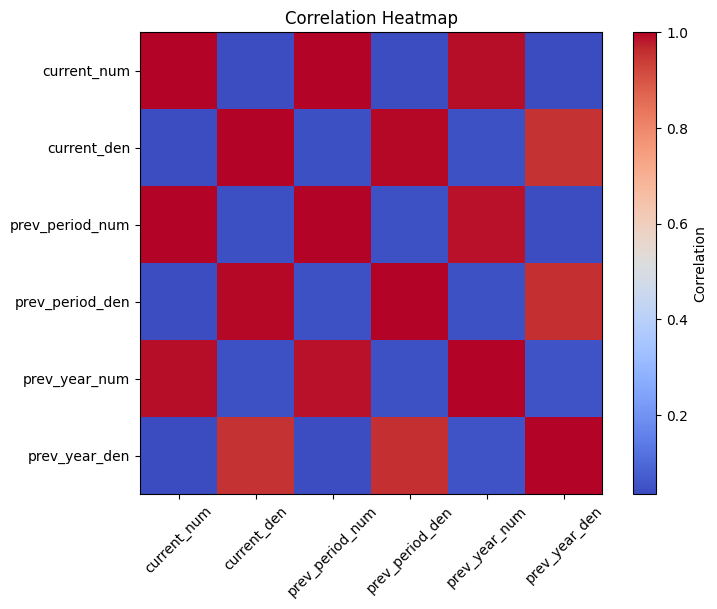

In [15]:
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

## 3. Categorical Data

Unique Values for Categorical Features

In [16]:
categorical_columns = ['line_of_business', 'product', 'segment', 'region','vertical','objective', 'metric_category_group', 'chart_label', 'period_label']

unique_values = {col: data_input[col].unique() for col in categorical_columns}

for col, unique_vals in unique_values.items():
    print(f"Unique values for {col}:\n{unique_vals}\n")

Unique values for line_of_business:
['LMS']

Unique values for product:
['FEED' 'INMAILS' 'LAN' 'NOT USED' 'OTHER']

Unique values for segment:
['ESG' 'OTHER']

Unique values for region:
['APAC' 'NAMER' 'EMEAL' 'NOT USED']

Unique values for vertical:
['Education' 'Financial Services' 'Government' 'Healthcare' 'Industrial'
 'Infrastructure & Connectivity' 'Media' 'PE & VC' 'Professional Services'
 'Retail' 'SaaS' 'Travel & Leisure' 'Unclassified' 'NOT USED']

Unique values for objective:
['BRAND_AWARENESS' 'ENGAGEMENT' 'WEBSITE_CONVERSION' 'VIDEO_VIEW'
 'UNKNOWN' 'JOB_APPLICANT' 'WEBSITE_VISIT' 'LEAD_GENERATION' 'TALENT_LEAD'
 'WEBSITE_TRAFFIC' 'NOT USED' 'CREATIVE_ENGAGEMENT' '-9']

Unique values for metric_category_group:
['Net Bookings (C$)' 'CTR' 'Clicks' 'Coverage' 'EFS' 'FUV'
 'Gross Bookings (USD)' 'Impressions' 'Inventory' 'eCPC' 'eCPM'
 'Matched Requests' 'Budget Utilization' 'Budgets' 'LAN Revenue Adoption']

Unique values for chart_label:
['L7D' 'Monthly-to-date' 'Quarterly-

### Categorical unique count

In [17]:
# Frequency counts for categorical columns
categorical_cols = ['line_of_business', 'product', 'segment', 'region', 'vertical', 'objective', 'metric_category_group', 'chart_label', 'period_label']

# Calculate and display the frequency counts for each categorical column
categorical_frequencies = {}
for col in categorical_cols:
    categorical_frequencies[col] = data_input[col].value_counts()

# Display the categorical frequency counts
categorical_frequencies

{'line_of_business': line_of_business
 LMS    25843
 Name: count, dtype: int64,
 'product': product
 OTHER       13065
 FEED         5785
 LAN          4589
 INMAILS      2392
 NOT USED       12
 Name: count, dtype: int64,
 'segment': segment
 ESG      25770
 OTHER       73
 Name: count, dtype: int64,
 'region': region
 NAMER       8229
 EMEAL       8099
 APAC        6695
 NOT USED    2820
 Name: count, dtype: int64,
 'vertical': vertical
 Unclassified                     3679
 Financial Services               2041
 Professional Services            2028
 SaaS                             2015
 Education                        1976
 Government                       1963
 Industrial                       1872
 Infrastructure & Connectivity    1846
 Retail                           1755
 Healthcare                       1742
 Media                            1742
 Travel & Leisure                 1612
 PE & VC                          1560
 NOT USED                           12
 Name: coun

# Trend Analysis

This section analyzes trends such as Variance to Outlook, Year-over-Year (YoY) changes, and Period-over-Period (PoP) changes.


### 1. Calculate Variance to Outlook, Year-over-Year Change, and Period-over-Period Change
The following code calculates these three metrics and stores them in new columns.

Period-over-Period (PoP) Change:
   - It calculates the percentage change in 'current_num' compared to the previous period ('prev_period_num').

Year-over-Year (YoY) Change:
* It calculates the percentage change in 'current_num' compared to the same period in the previous year ('prev_year_num').

In [18]:
data_input_trend = data_input.copy()

# Treat 'period_label' as a categorical feature
data_input_trend['period_label'] = data_input_trend['period_label'].astype('category')

# Calculate the period-over-period (PoP) change, handling potential division by zero
data_input_trend['PoP_change'] = np.where(data_input_trend['prev_period_num'] != 0,
                              (data_input_trend['current_num'] - data_input_trend['prev_period_num']) / data_input_trend['prev_period_num'],
                              np.nan)  # Set NaN where previous period number is 0

# Calculate YoY change, handling potential division by zero
data_input_trend['YoY_change'] = np.where(data_input_trend['prev_year_num'] != 0,
                              (data_input_trend['current_num'] - data_input_trend['prev_year_num']) / data_input_trend['prev_year_num'],
                              np.nan)  # Set NaN where previous year number is 0

# Handle any remaining infinite or NaN values by replacing them with 0
data_input_trend['YoY_change'].replace([np.inf, -np.inf], np.nan, inplace=True)
data_input_trend['PoP_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, you can fill NaN values with 0 or any other value of choice
data_input_trend['YoY_change'].fillna(0, inplace=True)
data_input_trend['PoP_change'].fillna(0, inplace=True)

data_input_trend['YoY_change'] = pd.to_numeric(data_input_trend['YoY_change'], errors='coerce')
data_input_trend['PoP_change'] = pd.to_numeric(data_input_trend['PoP_change'], errors='coerce')


<ipython-input-18-29016e859ce8>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_input_trend['YoY_change'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-18-29016e859ce8>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [19]:
# Perform the aggregation again
grouped_data = data_input_trend.groupby(
    ['line_of_business', 'product', 'region', 'vertical', 'objective', 'metric_category_group', 'chart_label']
).agg({
    'YoY_change': 'mean',
    'PoP_change': 'mean',
    'current_num': 'mean',
    'prev_period_num': 'mean',
    'prev_year_num': 'mean'
}).reset_index()

grouped_data.head()

,line_of_business,product,region,vertical,objective,metric_category_group,chart_label,YoY_change,PoP_change,current_num,prev_period_num,prev_year_num
0,LMS,FEED,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),L7D,-0.591346,-0.052022,13175.00,13898.00,32240.00
1,LMS,FEED,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,-0.397370,0.207855,37188.25,34732.00,62767.50
2,LMS,FEED,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),Quarterly-to-date,-0.240248,-0.128568,132140.00,154886.75,186522.75
3,LMS,FEED,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),Weekly,-0.455196,0.271997,11582.50,9907.50,23041.00
4,LMS,FEED,APAC,Education,ENGAGEMENT,Net Bookings (C$),L7D,0.601265,0.005395,13417.00,13345.00,8379.00


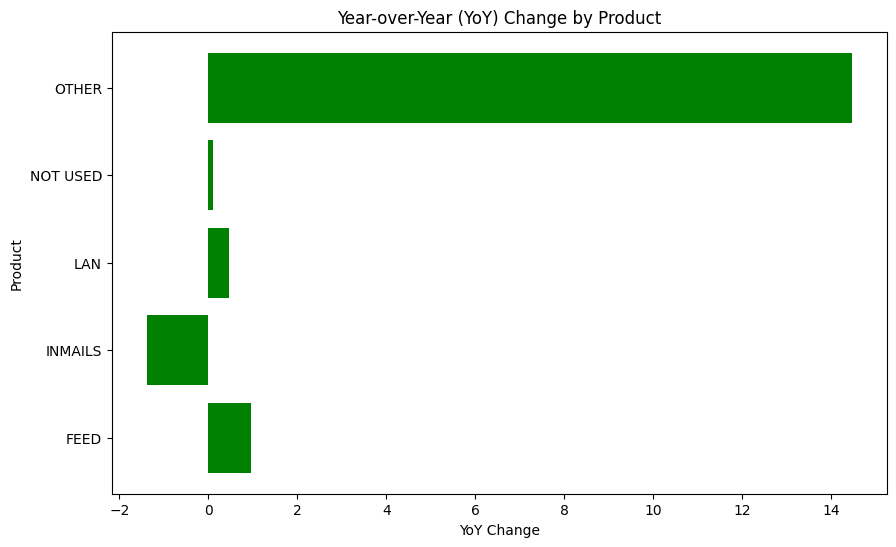

In [20]:
product_performance = data_input_trend.groupby('product').agg({
    'YoY_change': 'mean',
    'PoP_change': 'mean'
}).reset_index()


# Plot YoY Change by Product
plt.figure(figsize=(10, 6))
plt.barh(product_performance['product'], product_performance['YoY_change'], color='green')
plt.title('Year-over-Year (YoY) Change by Product')
plt.xlabel('YoY Change')
plt.ylabel('Product')
plt.show()


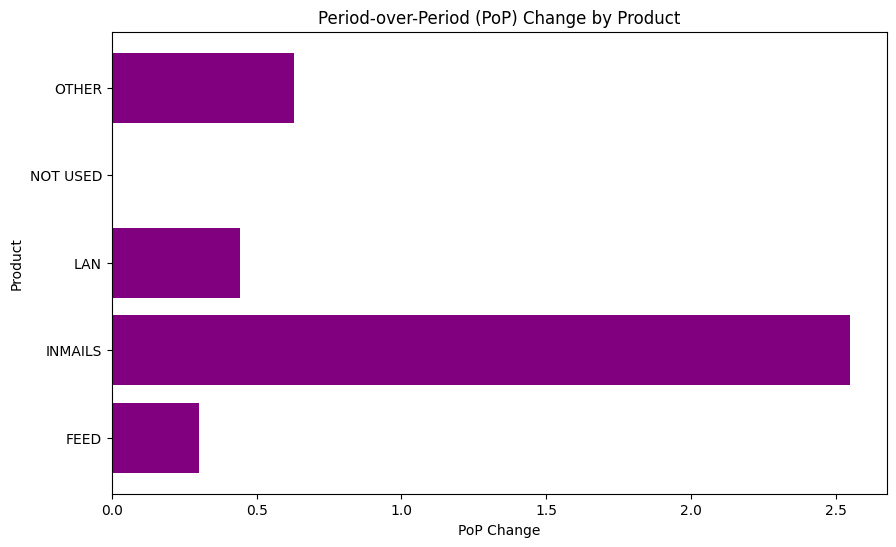

In [21]:
# Plot YoY Change by Product
plt.figure(figsize=(10, 6))
plt.barh(product_performance['product'], product_performance['PoP_change'], color='purple')
plt.title('Period-over-Period (PoP) Change by Product')
plt.xlabel('PoP Change')
plt.ylabel('Product')
plt.show()

<ipython-input-22-42518f8763f4>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(products))


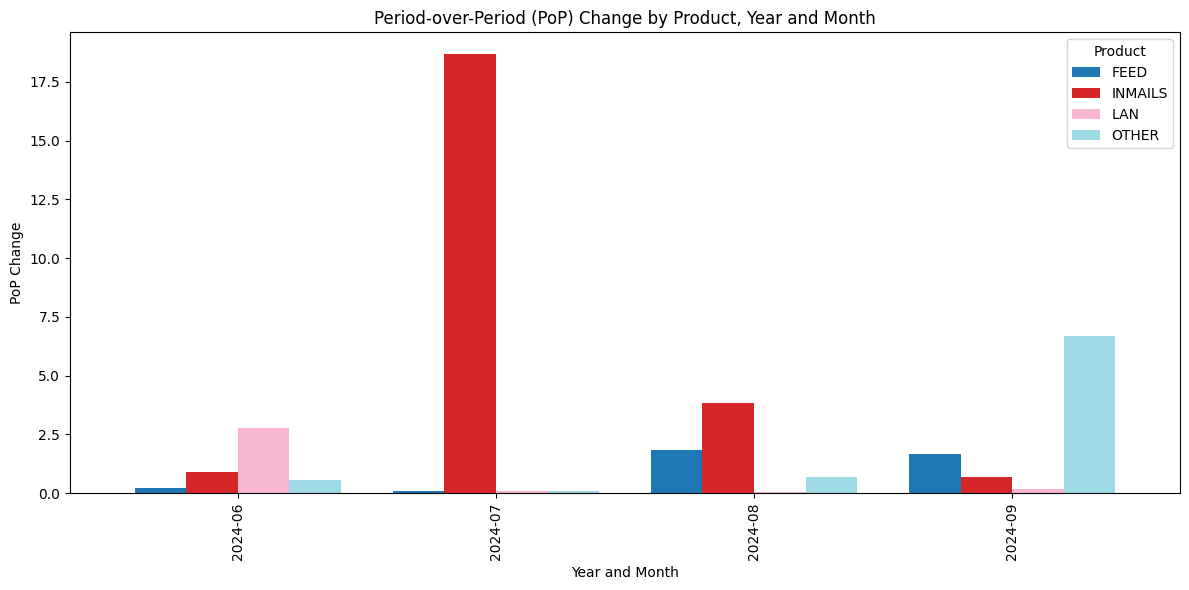

In [22]:

data_input_trend['period_label'] = pd.to_datetime(data_input_trend['period_label'], errors='coerce')
data_input_trend['year'] = data_input_trend['period_label'].dt.year
data_input_trend['month'] = data_input_trend['period_label'].dt.month


product_time_performance = data_input_trend.groupby(['product', 'year', 'month']).agg({
    'YoY_change': 'mean',
    'PoP_change': 'mean'
}).reset_index()


products = product_time_performance['product'].unique()
color_map = plt.cm.get_cmap('tab20', len(products))


pivot_data_pop = product_time_performance.pivot_table(
    index=['year', 'month'],
    columns='product',
    values='PoP_change'
)

plt.figure(figsize=(12, 6))

pivot_data_pop.plot(kind='bar', width=0.8, colormap=color_map, ax=plt.gca())


plt.title('Period-over-Period (PoP) Change by Product, Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('PoP Change')


plt.xticks(ticks=range(len(pivot_data_pop.index)), labels=[f'{int(year)}-{int(month):02d}' for year, month in pivot_data_pop.index], rotation=90)

plt.legend(title="Product")
plt.tight_layout()
plt.show()

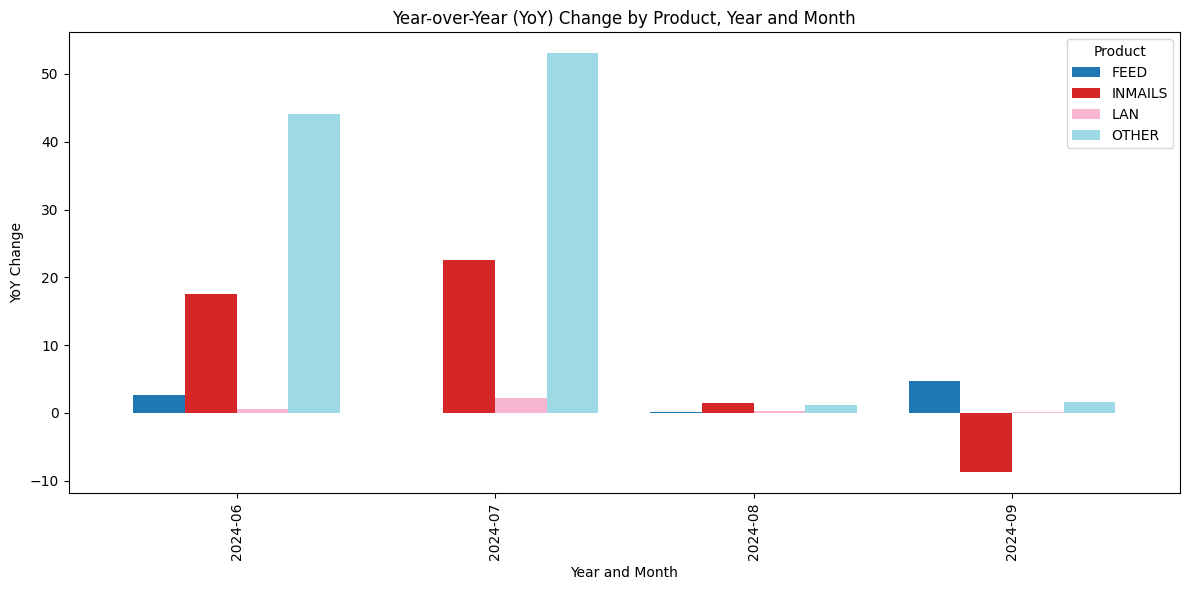

In [23]:
pivot_data_yoy = product_time_performance.pivot_table(
    index=['year', 'month'],
    columns='product',
    values='YoY_change'
)

plt.figure(figsize=(12, 6))


pivot_data_yoy.plot(kind='bar', width=0.8, colormap=color_map, ax=plt.gca())

plt.title('Year-over-Year (YoY) Change by Product, Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('YoY Change')


plt.xticks(ticks=range(len(pivot_data_yoy.index)), labels=[f'{int(year)}-{int(month):02d}' for year, month in pivot_data_yoy.index], rotation=90)

plt.legend(title="Product")
plt.tight_layout()
plt.show()


# Anomoly Detection using Input Data

In [24]:
data_input['chart_label']

,chart_label
0,L7D
1,Monthly-to-date
2,Quarterly-to-date
3,Monthly-to-date
4,Weekly
...,...
25838,Weekly
25839,Monthly-to-date
25840,Weekly
25841,Weekly


## Transform the 'period_label' for analysis

In [25]:
# Handling NaN replacement for 'L7D'
data_input.loc[(data_input['chart_label'] == 'L7D') & (data_input['period_label'].isna()), 'period_label'] = '2024-09-20'

# Function to convert the period_label to a proper date format
def convert_to_date(label):
    # Handle quarterly labels
    if 'FY' in label:
        year = int(label[2:4]) + 2000  # Extract the fiscal year
        quarter = label[-2:]
        if quarter == 'Q1':
            return pd.Timestamp(f'{year}-01-01')
        elif quarter == 'Q2':
            return pd.Timestamp(f'{year}-04-01')
        elif quarter == 'Q3':
            return pd.Timestamp(f'{year}-07-01')
        elif quarter == 'Q4':
            return pd.Timestamp(f'{year}-10-01')
    # Handle date-like labels
    try:
        return pd.to_datetime(label, format='%Y-%m-%d', errors='coerce')
    except ValueError:
        pass
    # Handle month labels like '2024-9'
    if '-' in label and len(label.split('-')) == 2:
        try:
            return pd.to_datetime(f'{label}-01', format='%Y-%m-%d')
        except ValueError:
            return pd.NaT
    return pd.NaT

# Apply the conversion function to the period_label column
data_input['period_label_converted'] = data_input['period_label'].apply(lambda x: convert_to_date(x) if pd.notna(x) else pd.NaT)

# Sort the dataset by the new period_label_converted
data_input = data_input.sort_values(by='period_label_converted')

In [26]:
data_input.head()

,line_of_business,product,segment,region,vertical,objective,metric_category_group,chart_label,period_label,current_num,current_den,prev_period_num,prev_period_den,prev_year_num,prev_year_den,period_label_converted
7749,LMS,INMAILS,ESG,EMEAL,Retail,ENGAGEMENT,Net Bookings (C$),Quarterly-to-date,FY24Q2,0,0,0,0,231,0,2024-04-01
19653,LMS,OTHER,ESG,NAMER,Media,ENGAGEMENT,Net Bookings (C$),Quarterly-to-date,FY24Q2,4813,0,1196,0,8724,0,2024-04-01
23967,LMS,OTHER,ESG,NAMER,Travel & Leisure,VIDEO_VIEW,Budget Utilization,Quarterly-to-date,FY24Q2,659512,649507,480640,461166,416618,431014,2024-04-01
23966,LMS,OTHER,ESG,NAMER,Travel & Leisure,JOB_APPLICANT,Budget Utilization,Quarterly-to-date,FY24Q2,50238,50005,76380,76577,68789,69554,2024-04-01
2825,LMS,FEED,ESG,NAMER,PE & VC,ENGAGEMENT,Net Bookings (C$),Quarterly-to-date,FY24Q2,131764,0,101207,0,122315,0,2024-04-01


In [27]:
data_input['chart_label'].unique()

array(['Quarterly-to-date', 'Weekly', 'L7D', 'Outlook', 'Monthly-to-date'],
      dtype=object)

In [28]:
data_input.columns

Index(['line_of_business', 'product', 'segment', 'region', 'vertical',
       'objective', 'metric_category_group', 'chart_label', 'period_label',
       'current_num', 'current_den', 'prev_period_num', 'prev_period_den',
       'prev_year_num', 'prev_year_den', 'period_label_converted'],
      dtype='object')

## Calculating percentage changes: (Current - Previous) / Previous * 100

In [29]:
# Perform safe division with np.where
data_input['pct_change_prev_period'] = np.where(
    (data_input['current_num'] == 0) & (data_input['prev_period_num'] == 0),
    0,  # Set to 0 if both current_num and prev_period_num are 0
    np.where(
        data_input['prev_period_num'] == 0,
        np.nan,  # Set to NaN if prev_period_num is zero to avoid division by zero
        (data_input['current_num'] - data_input['prev_period_num']) / data_input['prev_period_num'] * 100  # Calculate pct change
    )
)

# Now convert the result back to a pandas Series, then handle inf and NaN values
data_input['pct_change_prev_period'] = pd.Series(data_input['pct_change_prev_period']).replace([np.inf, -np.inf], np.nan).fillna(0)


data_input['diff_prev_period'] = data_input['current_num'] - data_input['prev_period_num']

# data_input['pct_change_prev_year'] = (data_input['current_num'] - data_input['prev_year_num']) / data_input['prev_year_num'] * 100

data_input[['line_of_business', 'product', 'segment', 'region', 'vertical', 'objective', 'chart_label', 'period_label', 'current_num', 'prev_period_num', 'prev_year_num', 'pct_change_prev_period']]

,line_of_business,product,segment,region,vertical,objective,chart_label,period_label,current_num,prev_period_num,prev_year_num,pct_change_prev_period
7749,LMS,INMAILS,ESG,EMEAL,Retail,ENGAGEMENT,Quarterly-to-date,FY24Q2,0,0,231,0.000000
19653,LMS,OTHER,ESG,NAMER,Media,ENGAGEMENT,Quarterly-to-date,FY24Q2,4813,1196,8724,302.424749
23967,LMS,OTHER,ESG,NAMER,Travel & Leisure,VIDEO_VIEW,Quarterly-to-date,FY24Q2,659512,480640,416618,37.215379
23966,LMS,OTHER,ESG,NAMER,Travel & Leisure,JOB_APPLICANT,Quarterly-to-date,FY24Q2,50238,76380,68789,-34.226237
2825,LMS,FEED,ESG,NAMER,PE & VC,ENGAGEMENT,Quarterly-to-date,FY24Q2,131764,101207,122315,30.192576
...,...,...,...,...,...,...,...,...,...,...,...,...
25833,LMS,OTHER,ESG,NOT USED,Unclassified,WEBSITE_VISIT,Monthly-to-date,2024-7,561339756,564509452,308854521,-0.561496
25835,LMS,OTHER,ESG,NOT USED,Unclassified,WEBSITE_TRAFFIC,Monthly-to-date,2024-7,7159640,8507054,27012908,-15.838785
25837,LMS,OTHER,ESG,NOT USED,Unclassified,WEBSITE_TRAFFIC,Monthly-to-date,2024-6,8507054,10870061,30600761,-21.738673
25839,LMS,OTHER,ESG,NOT USED,Unclassified,VIDEO_VIEW,Monthly-to-date,2024-9,107725907,95914441,31747994,12.314586


## Simple standard deviation outlier detection

### Determin the aggregation level

We went through each level of aggregations, and seeing how much data poitns were in these levels. Higher granular aggregations obviously have less data and it makes the std deviation calculation unhelpful. At 'chart_label', 'product', 'region', 'vertical', 'metric_category_group' there is an average of 25 data points per group while also preserving the unique attributes and magnitudes of metrics

In [30]:
data_input.groupby(['chart_label', 'product', 'region', 'vertical', 'metric_category_group'])['pct_change_prev_period'].count().mean()

25.163583252190847

## Anomaly detection

In [31]:
# Define the aggregation level
agg_columns = ['chart_label', 'product', 'region', 'vertical', 'metric_category_group']

# Function to flag anomalies based on standard deviation
def flag_anomalies(df, agg_columns, threshold=2):
    # Calculate mean and standard deviation for each group
    stats = df.groupby(agg_columns)['pct_change_prev_period'].agg(['mean', 'std']).reset_index()

    # Merge stats back to the original dataframe
    df = df.merge(stats, on=agg_columns, how='left')

    # Flag anomalies based on the threshold
    df['anomaly_flag'] = (df['pct_change_prev_period'] - df['mean']).abs() > threshold * df['std']

    return df

# Apply the anomaly flagging function
data_flagged = flag_anomalies(data_input, agg_columns)

# Display relevant columns
data_flagged[['product', 'segment', 'region', 'vertical', 'objective', 'metric_category_group', 'chart_label', 'pct_change_prev_period', 'mean', 'std', 'anomaly_flag']]

,product,segment,region,vertical,objective,metric_category_group,chart_label,pct_change_prev_period,mean,std,anomaly_flag
0,INMAILS,ESG,EMEAL,Retail,ENGAGEMENT,Net Bookings (C$),Quarterly-to-date,0.000000,-10.417028,39.100406,False
1,OTHER,ESG,NAMER,Media,ENGAGEMENT,Net Bookings (C$),Quarterly-to-date,302.424749,216.647650,983.738850,False
2,OTHER,ESG,NAMER,Travel & Leisure,VIDEO_VIEW,Budget Utilization,Quarterly-to-date,37.215379,6.077759,54.400288,False
3,OTHER,ESG,NAMER,Travel & Leisure,JOB_APPLICANT,Budget Utilization,Quarterly-to-date,-34.226237,6.077759,54.400288,False
4,FEED,ESG,NAMER,PE & VC,ENGAGEMENT,Net Bookings (C$),Quarterly-to-date,30.192576,10.183070,108.033476,False
...,...,...,...,...,...,...,...,...,...,...,...
25838,OTHER,ESG,NOT USED,Unclassified,WEBSITE_VISIT,eCPM,Monthly-to-date,-0.561496,34.530439,189.248877,False
25839,OTHER,ESG,NOT USED,Unclassified,WEBSITE_TRAFFIC,eCPM,Monthly-to-date,-15.838785,34.530439,189.248877,False
25840,OTHER,ESG,NOT USED,Unclassified,WEBSITE_TRAFFIC,eCPM,Monthly-to-date,-21.738673,34.530439,189.248877,False
25841,OTHER,ESG,NOT USED,Unclassified,VIDEO_VIEW,eCPM,Monthly-to-date,12.314586,34.530439,189.248877,False


### Extract the 'true' in anomaly_flag

In [32]:
data_flagged[data_flagged['anomaly_flag'] == True]


,line_of_business,product,segment,region,vertical,objective,metric_category_group,chart_label,period_label,current_num,...,prev_period_num,prev_period_den,prev_year_num,prev_year_den,period_label_converted,pct_change_prev_period,diff_prev_period,mean,std,anomaly_flag
17,LMS,OTHER,ESG,EMEAL,Media,BRAND_AWARENESS,Net Bookings (C$),Quarterly-to-date,FY24Q2,8554,...,2423,0,5551,0,2024-04-01,253.033430,6131,-11.680922,73.803297,True
18,LMS,FEED,ESG,EMEAL,PE & VC,JOB_APPLICANT,Net Bookings (C$),Quarterly-to-date,FY24Q2,627,...,24,0,6234,0,2024-04-01,2512.500000,603,93.840361,436.311673,True
63,LMS,OTHER,ESG,APAC,Media,WEBSITE_CONVERSION,Net Bookings (C$),Quarterly-to-date,FY24Q2,355,...,79,0,234,0,2024-04-01,349.367089,276,8.195357,89.932720,True
74,LMS,FEED,ESG,NAMER,PE & VC,JOB_APPLICANT,Net Bookings (C$),Quarterly-to-date,FY24Q2,3864,...,565,0,12716,0,2024-04-01,583.893805,3299,10.183070,108.033476,True
82,LMS,FEED,ESG,NAMER,Media,TALENT_LEAD,Net Bookings (C$),Quarterly-to-date,FY24Q2,0,...,376,0,10034,0,2024-04-01,-100.000000,-376,11.167991,52.658625,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25738,LMS,OTHER,ESG,NOT USED,Unclassified,UNKNOWN,LAN Revenue Adoption,Monthly-to-date,2024-7,0,...,312,101656,461,99908,NaT,-100.000000,-312,-6.703015,33.103913,True
25751,LMS,OTHER,ESG,NOT USED,Unclassified,TALENT_LEAD,LAN Revenue Adoption,Monthly-to-date,2024-8,51,...,1830,77753,6018,163432,NaT,-97.213115,-1779,-6.703015,33.103913,True
25755,LMS,OTHER,ESG,NOT USED,Unclassified,CREATIVE_ENGAGEMENT,LAN Revenue Adoption,Monthly-to-date,2024-7,0,...,316,1964,459,6312,NaT,-100.000000,-316,-6.703015,33.103913,True
25797,LMS,OTHER,ESG,EMEAL,Unclassified,-9,Net Bookings (C$),Monthly-to-date,2024-7,0,...,-846,0,0,0,NaT,-100.000000,846,-15.789910,36.945441,True


In [33]:
data_flagged[data_flagged['anomaly_flag'] == True][['product', 'segment', 'region', 'vertical', 'objective','metric_category_group', 'period_label', 'chart_label', 'pct_change_prev_period', 'mean', 'std', 'anomaly_flag']]

,product,segment,region,vertical,objective,metric_category_group,period_label,chart_label,pct_change_prev_period,mean,std,anomaly_flag
17,OTHER,ESG,EMEAL,Media,BRAND_AWARENESS,Net Bookings (C$),FY24Q2,Quarterly-to-date,253.033430,-11.680922,73.803297,True
18,FEED,ESG,EMEAL,PE & VC,JOB_APPLICANT,Net Bookings (C$),FY24Q2,Quarterly-to-date,2512.500000,93.840361,436.311673,True
63,OTHER,ESG,APAC,Media,WEBSITE_CONVERSION,Net Bookings (C$),FY24Q2,Quarterly-to-date,349.367089,8.195357,89.932720,True
74,FEED,ESG,NAMER,PE & VC,JOB_APPLICANT,Net Bookings (C$),FY24Q2,Quarterly-to-date,583.893805,10.183070,108.033476,True
82,FEED,ESG,NAMER,Media,TALENT_LEAD,Net Bookings (C$),FY24Q2,Quarterly-to-date,-100.000000,11.167991,52.658625,True
...,...,...,...,...,...,...,...,...,...,...,...,...
25738,OTHER,ESG,NOT USED,Unclassified,UNKNOWN,LAN Revenue Adoption,2024-7,Monthly-to-date,-100.000000,-6.703015,33.103913,True
25751,OTHER,ESG,NOT USED,Unclassified,TALENT_LEAD,LAN Revenue Adoption,2024-8,Monthly-to-date,-97.213115,-6.703015,33.103913,True
25755,OTHER,ESG,NOT USED,Unclassified,CREATIVE_ENGAGEMENT,LAN Revenue Adoption,2024-7,Monthly-to-date,-100.000000,-6.703015,33.103913,True
25797,OTHER,ESG,EMEAL,Unclassified,-9,Net Bookings (C$),2024-7,Monthly-to-date,-100.000000,-15.789910,36.945441,True


## Filter for input llm dataset

Here we are only taking 'data_flagged['anomaly_flag'] == True', and we append the outlook only when we choose 'Quarterly-to-date'

In [34]:
data_flagged[data_flagged['objective'] == 'TALENT_LEAD']['metric_category_group'].unique()

array(['Net Bookings (C$)', 'Budgets', 'Budget Utilization', 'eCPM',
       'Gross Bookings (USD)', 'Clicks', 'eCPC', 'Impressions', 'CTR',
       'LAN Revenue Adoption'], dtype=object)

In [35]:
data_flagged['chart_label'].unique()

array(['Quarterly-to-date', 'Weekly', 'L7D', 'Outlook', 'Monthly-to-date'],
      dtype=object)

In [36]:
data_flagged['objective'].unique()

array(['ENGAGEMENT', 'VIDEO_VIEW', 'JOB_APPLICANT', 'WEBSITE_VISIT',
       'WEBSITE_CONVERSION', 'BRAND_AWARENESS', 'CREATIVE_ENGAGEMENT',
       'TALENT_LEAD', 'UNKNOWN', 'WEBSITE_TRAFFIC', 'LEAD_GENERATION',
       'NOT USED', '-9'], dtype=object)

In [37]:
def filter_for_llm_input(data_flagged, objectives, chart_labels):
    # Filter based on the provided objectives (as a list), chart_labels (as a list), and anomaly_flag = True
    filtered_data = data_flagged[
        (data_flagged['objective'].isin(objectives)) &
        (data_flagged['chart_label'].isin(chart_labels)) &
        (data_flagged['anomaly_flag'] == True)
    ]

    # Check if 'Quarterly-to-date' exists in the filtered data's chart labels
    if 'Quarterly-to-date' in filtered_data['chart_label'].values:
        # Subset where 'chart_label' is 'Outlook' and append only when 'Quarterly-to-date' is present
        data_flagged_outlook = data_flagged[data_flagged['chart_label'] == 'Outlook']

        # Append (concatenate) the two subsets
        combined_data = pd.concat([filtered_data, data_flagged_outlook], ignore_index=True)
    else:
        # If 'Quarterly-to-date' is not in the filtered data, return only the filtered data
        combined_data = filtered_data

    return combined_data


In [52]:
# List of objectives you want to filter by
objectives = ['BRAND_AWARENESS']

# List of chart labels you want to filter by
chart_labels = ['Monthly-to-date']

# Call the function with your dataset
filtered_llm_input = filter_for_llm_input(data_flagged, objectives, chart_labels)

# View the result
filtered_llm_input

,line_of_business,product,segment,region,vertical,objective,metric_category_group,chart_label,period_label,current_num,...,prev_period_num,prev_period_den,prev_year_num,prev_year_den,period_label_converted,pct_change_prev_period,diff_prev_period,mean,std,anomaly_flag
17987,LMS,FEED,ESG,APAC,Education,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-9,40175,...,18947,0,77311,0,NaT,112.038845,21228,1.302350,36.834514,True
18059,LMS,FEED,ESG,APAC,Financial Services,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-8,151925,...,63725,0,71454,0,NaT,138.407219,88200,-4.553078,42.943357,True
18492,LMS,FEED,ESG,APAC,Industrial,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-9,38541,...,16131,0,95032,0,NaT,138.925051,22410,3.429144,46.887082,True
18756,LMS,FEED,ESG,APAC,PE & VC,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-8,5068,...,2978,0,4283,0,NaT,70.181330,2090,-7.042310,31.747459,True
18768,LMS,FEED,ESG,APAC,PE & VC,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-9,1175,...,4360,0,3813,0,NaT,-73.050459,-3185,-7.042310,31.747459,True
18829,LMS,FEED,ESG,EMEAL,PE & VC,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-8,33790,...,19193,0,29533,0,NaT,76.053770,14597,-0.197362,33.779915,True
19065,LMS,FEED,ESG,APAC,Retail,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-7,87041,...,35344,0,17821,0,NaT,146.268108,51697,9.814785,67.580186,True
19682,LMS,INMAILS,ESG,EMEAL,Education,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-8,374,...,2411,0,153,0,NaT,-84.487764,-2037,-4.342181,33.159585,True
19688,LMS,INMAILS,ESG,NAMER,Education,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-7,3749,...,3,0,1,0,NaT,124866.666667,3746,5209.763768,25486.950950,True
19699,LMS,INMAILS,ESG,EMEAL,Education,BRAND_AWARENESS,Net Bookings (C$),Monthly-to-date,2024-9,0,...,374,0,243,0,NaT,-100.000000,-374,-4.342181,33.159585,True


In [53]:
cols_to_give_to_llm = [
    # "line_of_business",
    "product",
    # "segment",
    "region",
    "vertical",
    "objective",
    "metric_category_group",
    "chart_label",
    "period_label",
    "current_num",
    "prev_period_num",
    "prev_year_num",
    "pct_change_prev_period",
    "mean",
    "std",
    "anomaly_flag"
]

llm_ready_dataset = filtered_llm_input[cols_to_give_to_llm]
llm_ready_dataset.shape

(37, 14)

In [44]:
# save to drive for analysis

# llm_ready_dataset.to_csv('/content/drive/MyDrive/llm_ready_dataset.csv', index=False)


# LLMs: Reporting on outliers and generating narratives

## Connect LLM Agent

### Initialize

In [54]:
file = open('/content/drive/MyDrive/GT/API_KEYS/openai_outlier_key.txt', 'r')
client = OpenAI(api_key=file.read())
file.close()

## LLM-1: Generate plots of High-level Anomaly Report

In [ ]:
# - Summary counts of number of anomalies by relevant groups, use a bar chart

In [57]:
system_intel_relevancy = "You are a data analyst. You are very excellent at summarizing outlier data and generating visuals"

context_relevancy = f"""
Given this dataframe of anomalous performance metrics by different verticals and regions, please write
python code that visualizes each relevant groups' prevelance of outliers and metric distributions.
Specifically generate:
- Prevalence of Outliers by Region and Vertical: A vertical bar chart sort from highest to lowest number count.
- Summary counts of number of anomalies by metric_category_group

Data (llm_ready_dataset): {llm_ready_dataset}

Answer in this format
Python visual code:
<python code start>
[YOUR CODE HERE]
<python code end>


"""
responses_relevancy = client.chat.completions.create(
  model="gpt-3.5-turbo", #gpt-4-turbo (expensive), gpt-3.5-turbo (cheap)
  messages=[
      {"role": "system", "content": system_intel_relevancy},
      {"role": "user", "content": context_relevancy}
  ]
)
ai_message_output = responses_relevancy.choices[0].message.content
print(ai_message_output)

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Prevalence of Outliers by Region and Vertical (Vertical bar chart sort from highest to lowest number count)
outliers_count = llm_ready_dataset.groupby(['region', 'vertical'])['anomaly_flag'].sum().reset_index()
outliers_count = outliers_count.sort_values(by='anomaly_flag', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='anomaly_flag', y='vertical', hue='region', data=outliers_count)
plt.xlabel('Number of Outliers')
plt.ylabel('Vertical')
plt.title('Prevalence of Outliers by Region and Vertical')
plt.show()

# Summary counts of number of anomalies by metric_category_group
anomaly_counts = llm_ready_dataset.groupby('metric_category_group')['anomaly_flag'].sum()
anomaly_counts = anomaly_counts.reset_index().sort_values(by='anomaly_flag', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='metric_category_group', y='anomaly_flag', data=anomaly_counts)
plt.xlabel('Metric Category Group')
plt.ylabel('Num

### Extract Visualization Python from LLM-3 output
**WARNING**: Executing code generated by AI carries inherent risks. While AI can be a powerful tool for code creation, it may produce errors, security vulnerabilities, or unoptimized code. Always thoroughly review AI-generated code before execution, run it in a controlled environment with limited permissions, and test with non-critical data. Remember that the responsibility for code safety and correctness ultimately lies with the human operator. Treat AI as an assistant rather than an infallible authority, and implement appropriate safety measures such as code review, sandboxing, and incremental testing.

Executing code block 1...


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


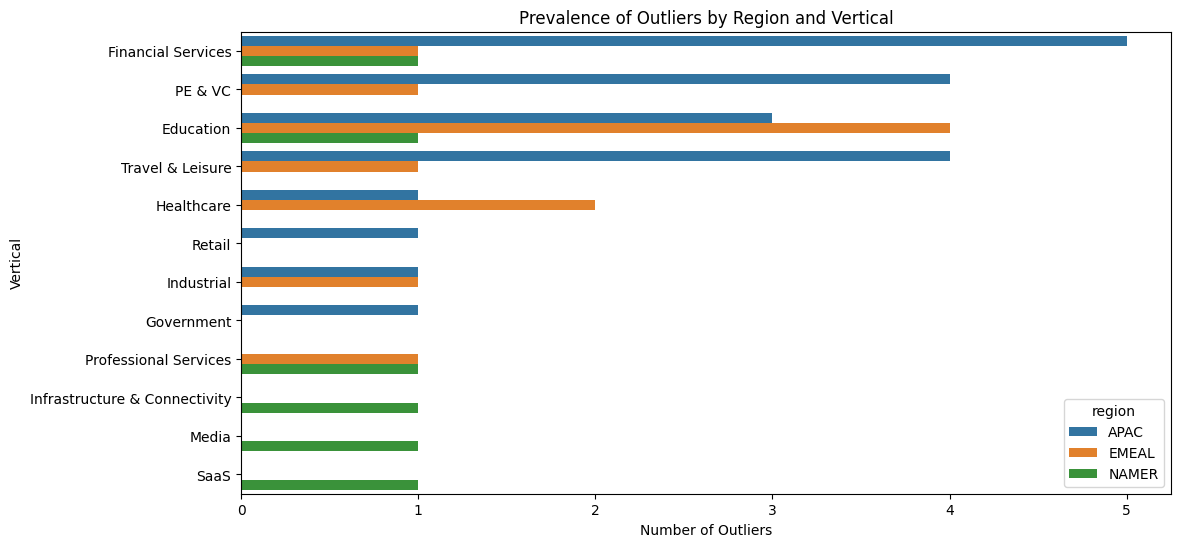

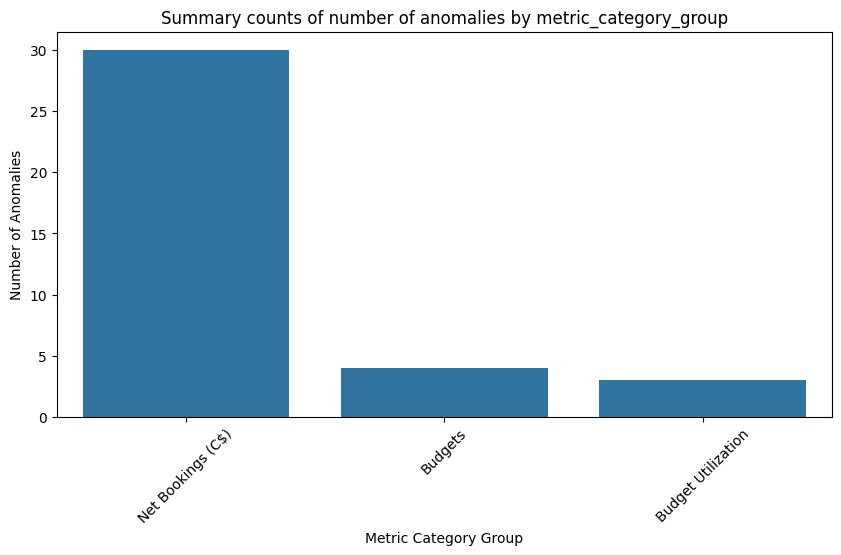

Code block 1 executed successfully.
All code blocks executed successfully.


In [60]:
def extract_python_code(text):
    pattern = r'```python(.*?)```'
    matches = re.findall(pattern, text, re.DOTALL)
    return [match.strip() for match in matches]

def separate_imports(code):
    tree = ast.parse(code)
    imports = []
    other_code = []

    for node in tree.body:
        if isinstance(node, (ast.Import, ast.ImportFrom)):
            imports.append(ast.unparse(node))
        else:
            other_code.append(ast.unparse(node))

    return '\n'.join(imports), '\n'.join(other_code)

def safe_exec(code_string, global_dict=None):
    safe_globals = {
        'plt': plt,
        'pd': pd,
        'sns': sns,
        'np': np,
        '__builtins__': {
            'range': range,
            'len': len,
            'zip': zip,
            'True': True,
            'False': False,
            'list': list,
            'dict': dict,
            'tuple': tuple,
            'set': set,
            'int': int,
            'float': float,
            'str': str,
            'bool': bool,
        }
    }

    if global_dict:
        safe_globals.update(global_dict)

    exec(code_string, safe_globals)

    return safe_globals

# Extract all Python code blocks
code_blocks = extract_python_code(ai_message_output)

if code_blocks:
    all_imports = []
    all_main_code = []

    for code in code_blocks:
        # Separate imports and main code for each block
        imports, main_code = separate_imports(code)
        all_imports.append(imports)
        all_main_code.append(main_code)

    # Combine all imports and execute them
    combined_imports = '\n'.join(all_imports)
    exec(combined_imports)

    # Prepare data (you need to have llm_ready_dataset defined)
    global_dict = {'llm_ready_dataset': llm_ready_dataset}

    # Execute each main code block
    for i, main_code in enumerate(all_main_code, 1):
        print(f"Executing code block {i}...")
        result = safe_exec(main_code, global_dict)
        print(f"Code block {i} executed successfully.")

    print("All code blocks executed successfully.")
else:
    print("No Python code found in the AI's output.")

## LLM-2: Get time-series data relevant to anomalies in high-level reports.

### Feed in data
For each Objective (e.g., BRAND_AWARENESS), we extract all the anomaly data at a specified reporting interval (e.g., Monthly), alongside all the metrics belonging to `metric_category_group` and each respective vertical and region.

This data is then submitted to the `LLM #2` to generate SQL data which will be used to query relevant periods and data from the time-series dataframe.

In [101]:
system_intel_relevancy = "You are a data analyst. You are very proficient at identifying data sources relevant to the anomoly detection clusters."

context_relevancy = f"""
Given this dataframe that has been labeled as a group of clusters, what fields in the underlying time-series
are relevant to diagnosing the outlier?

Row: {llm_ready_dataset}

Underlying time-series (data_ts)
data_ts sample:
{data_ts.head(2)}

Return answers in the following format, no bullet points:
Relevant in data_ts:
relevant_fields: ['relevant_col1', 'relevent_col2', etc..]
specific filters: ['date between x and y', etc]

SQL:
Note, if chart_label is Monthly, then any date filtering should use monthly equivalences.
Ensure you filter on the objective: {llm_ready_dataset['objective'].unique()[0]}.

<start SQL>
[enter SQL query here]
<end SQL>

Your opinion on what might make this row an anomaly:

Next steps:
[enter bullet-points of next steps here]

"""
responses_relevancy = client.chat.completions.create(
  model="gpt-3.5-turbo", #gpt-4-turbo (expensive), gpt-3.5-turbo (cheap)
  messages=[
      {"role": "system", "content": system_intel_relevancy},
      {"role": "user", "content": context_relevancy}
  ]
)
ai_message_output = responses_relevancy.choices[0].message.content
print(ai_message_output)

Relevant in data_ts:
relevant_fields: ['day_begin', 'line_of_business', 'product', 'segment', 'vertical', 'objective', 'region', 'metric_category_group', 'metric_value_num']
specific filters: ['day_begin between 2023-06-01 and 2024-09-30']

SQL:
Note, if chart_label is Monthly, then any date filtering should use monthly equivalences. 
Ensure you filter on the objective: BRAND_AWARENESS. 

<start SQL>
SELECT *
FROM data_ts
WHERE day_begin >= '2023-06-01' AND day_begin <= '2024-09-30'
AND objective = 'BRAND_AWARENESS';
<end SQL>

Your opinion on what might make this row an anomaly:
The row might be considered an anomaly due to significant percentage changes in the 'current_num' compared to 'prev_period_num' and 'prev_year_num', as well as large deviations from the mean and high standard deviations in the data.

Next steps:
- Conduct a deeper analysis to understand the root cause of the anomalies in the 'current_num'.
- Investigate potential data quality issues or measurement errors that 

### Extract SQL from LLM-2 output

In [102]:
pattern = r'<start SQL>(.*?)<end SQL>'
match = re.search(pattern, ai_message_output, re.DOTALL)

if match:
    sql_code = match.group(1).strip()
    print(sql_code)
else:
    print("No SQL code found between the tags.")

SELECT *
FROM data_ts
WHERE day_begin >= '2023-06-01' AND day_begin <= '2024-09-30'
AND objective = 'BRAND_AWARENESS';


In [64]:
# sql_code = '''
#     SELECT *
#     FROM data_ts
#     WHERE day_begin >= '2023-06-01' AND day_begin <= '2024-09-30'
#     AND objective = 'BRAND_AWARENESS'
#     '''

# Execute the SQL query on the pandas dataframe
filtered_ts_data = psql.sqldf(sql_code, locals())

filtered_ts_data.fillna(1, inplace=True)
filtered_ts_data['metric_value'] = filtered_ts_data['metric_value_num'] / filtered_ts_data['metric_value_den']

In [91]:
filtered_ts_data.shape

(93713, 11)

### Visualize Time-series output for Objective

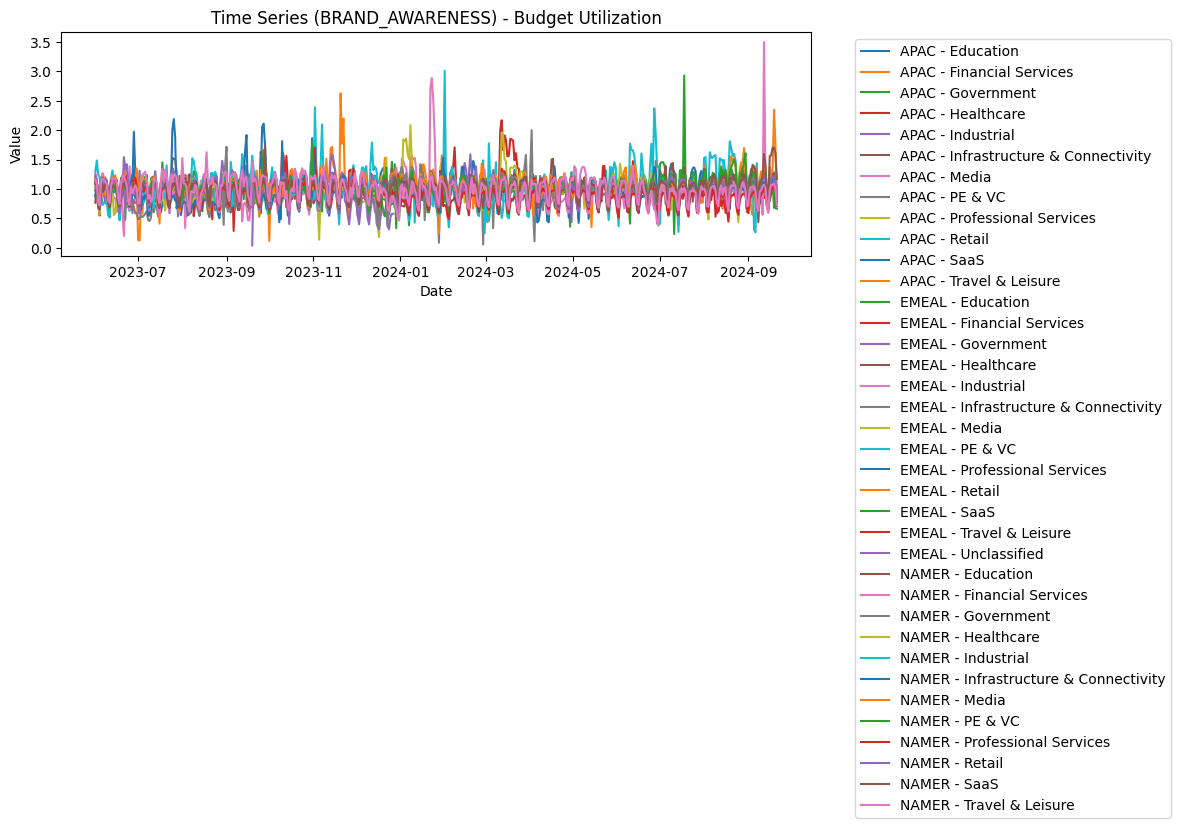

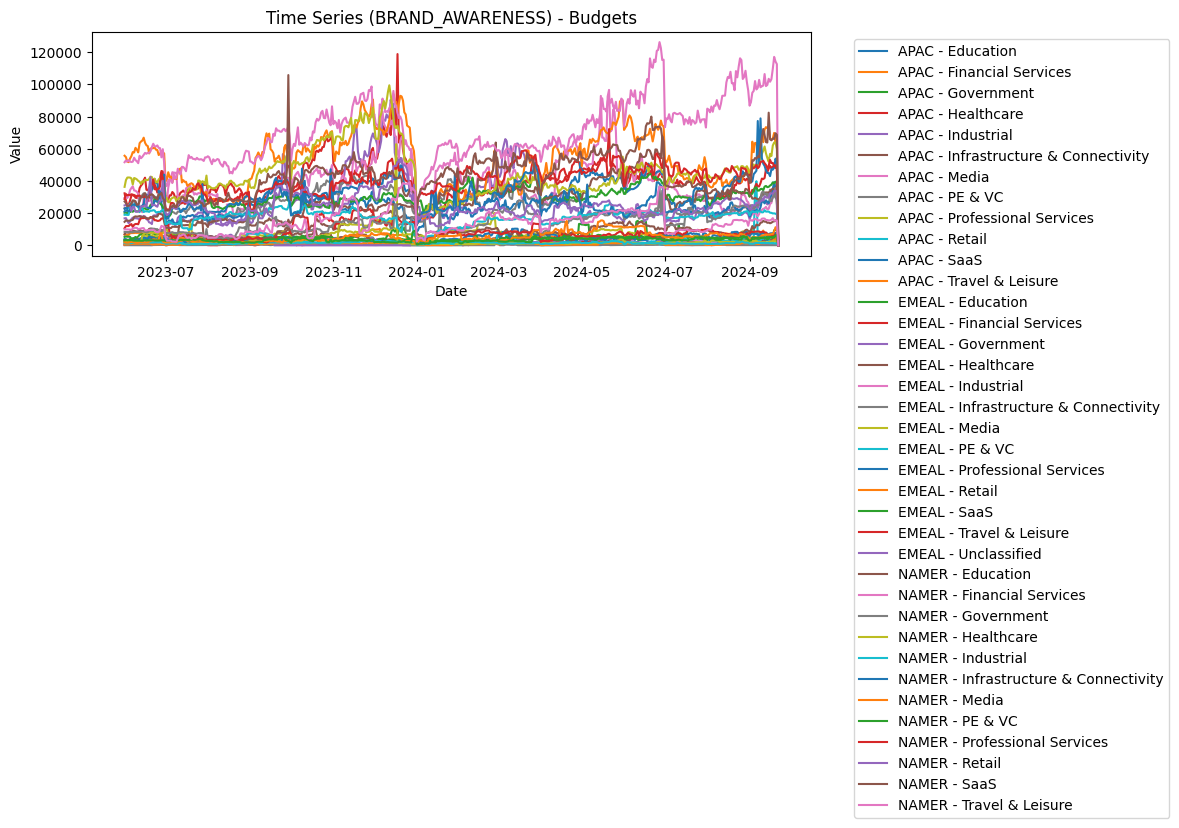

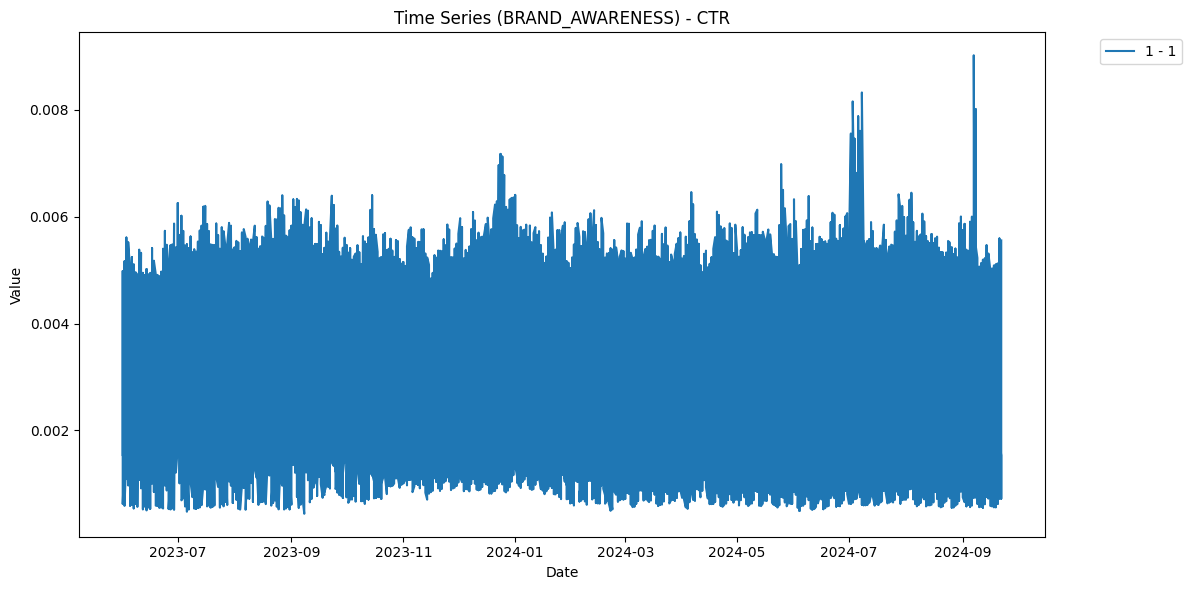

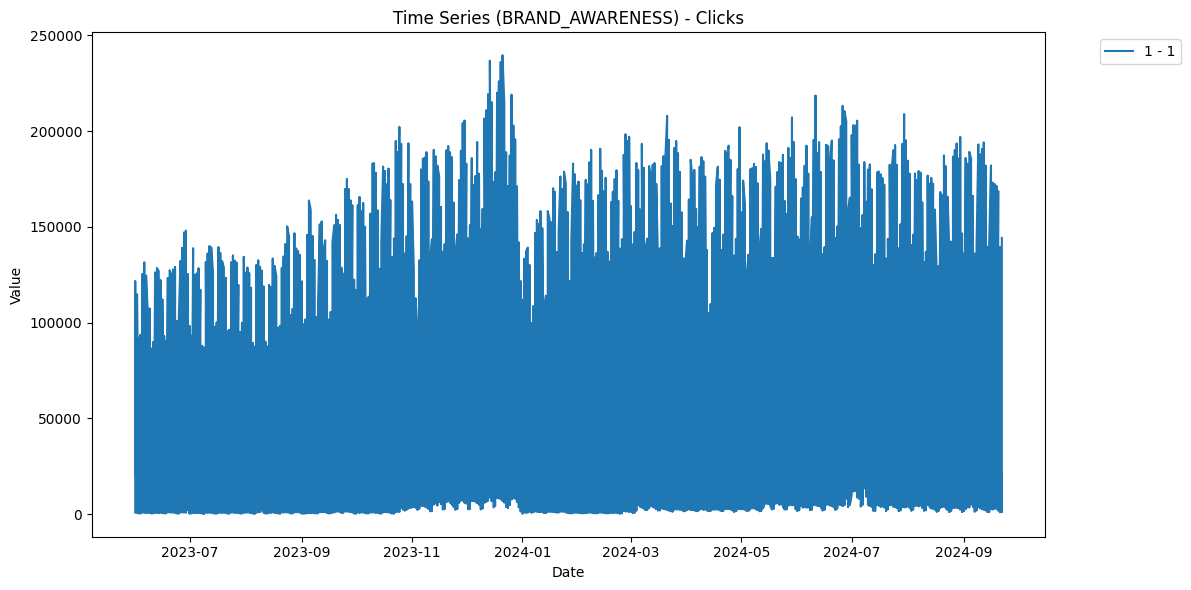

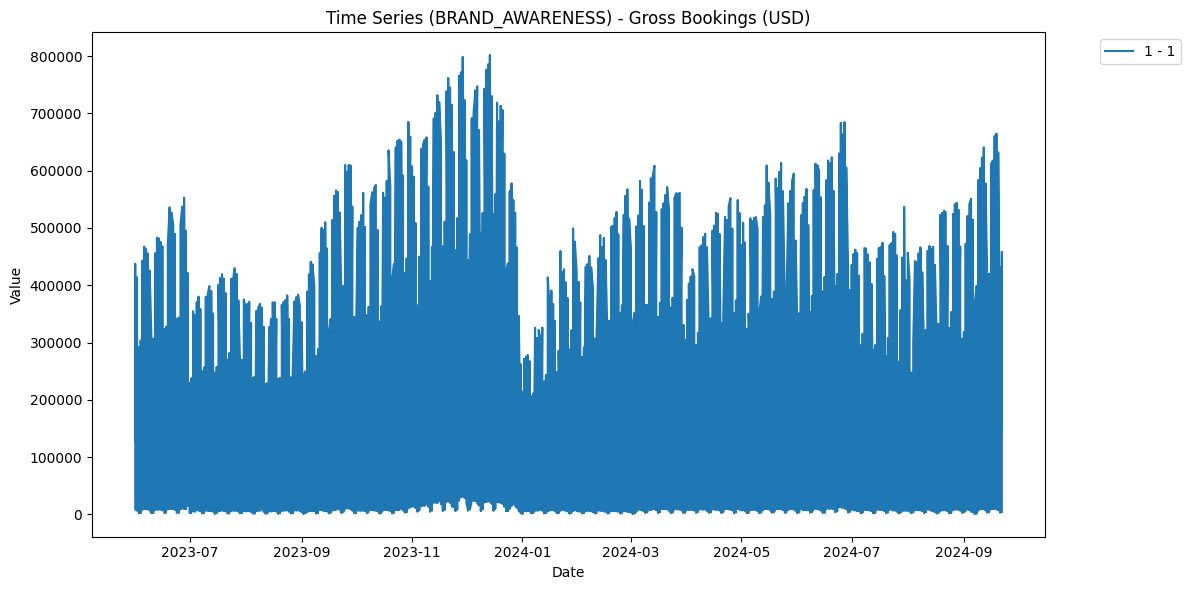

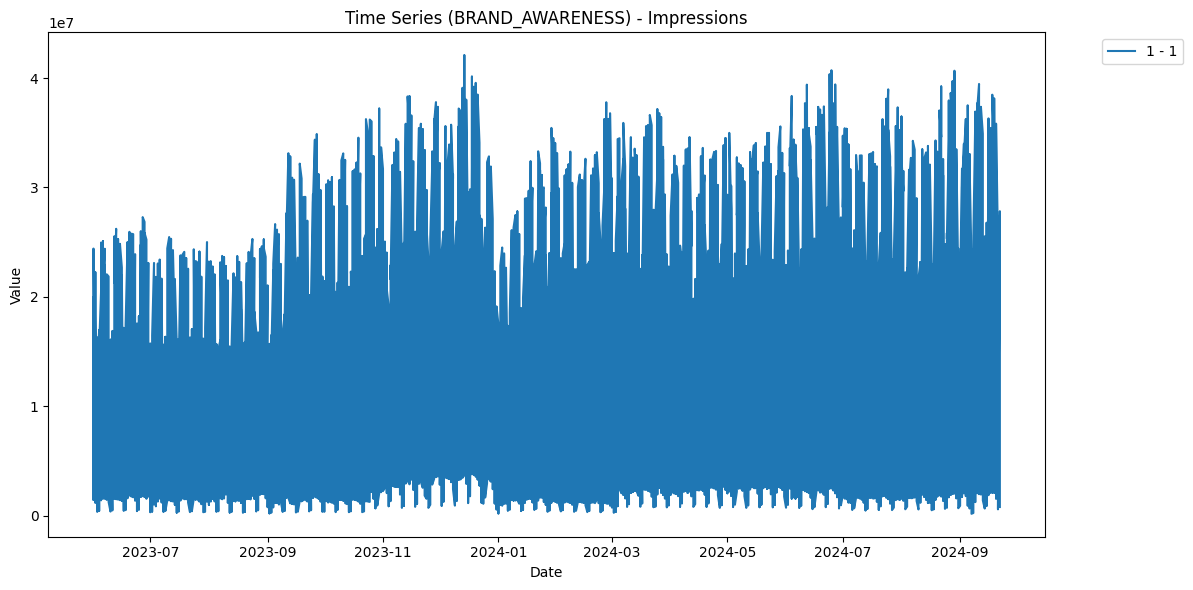

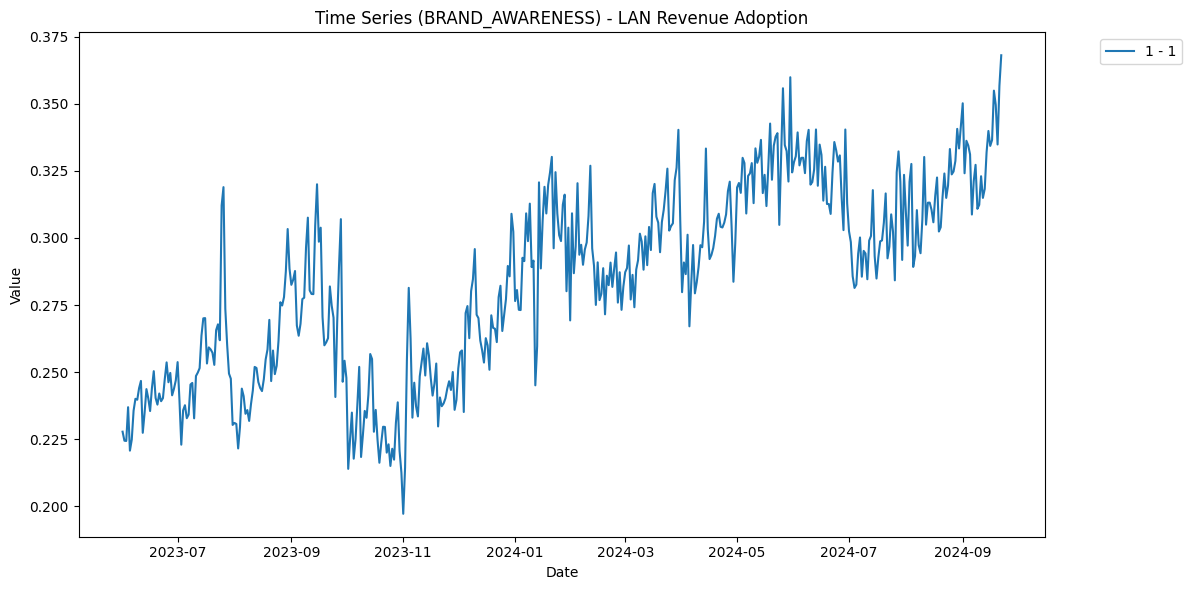

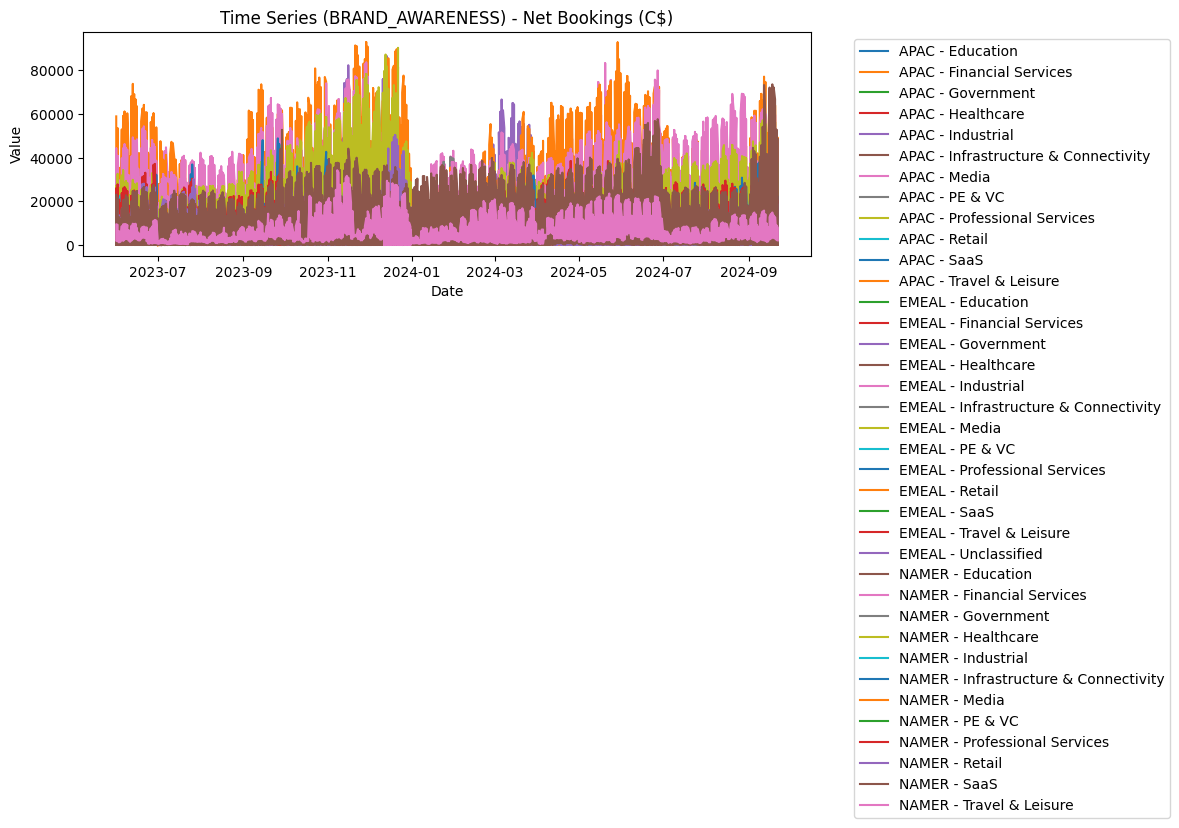

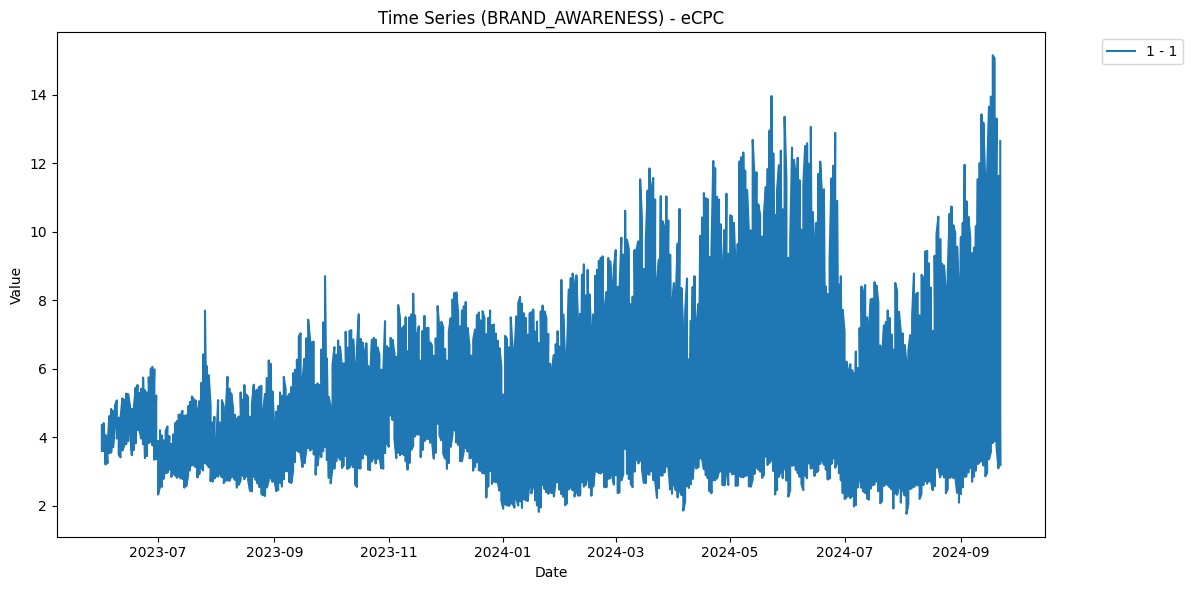

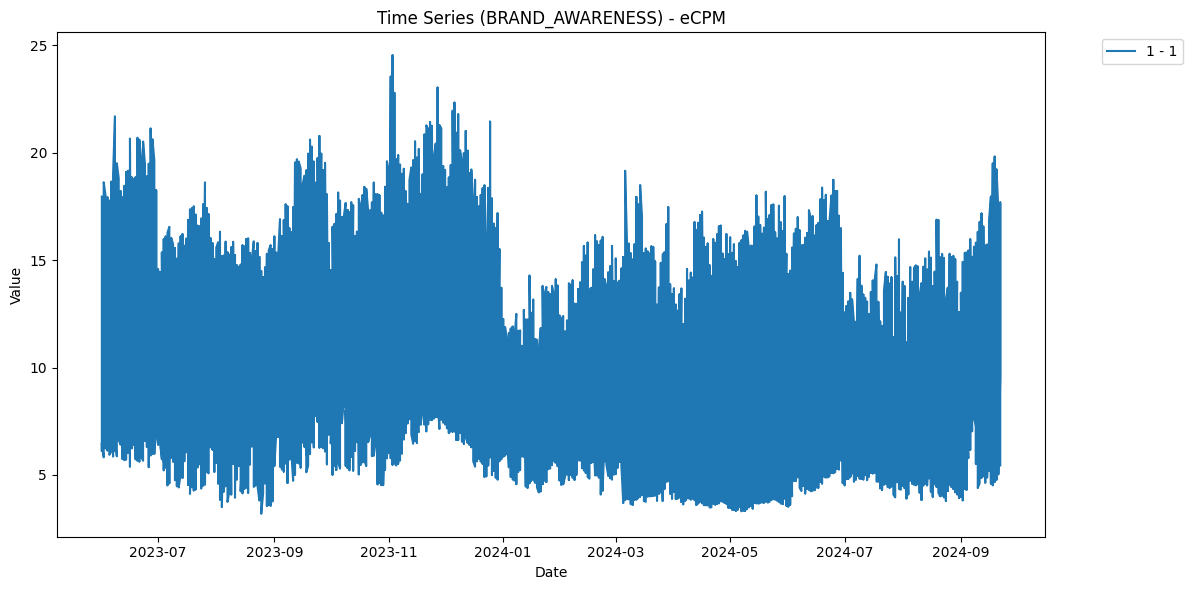

Time series plots created without '1 - 1' for single lines.


In [90]:
# Convert 'day_begin' to datetime to handle the time series correctly
filtered_ts_data['day_begin'] = pd.to_datetime(filtered_ts_data['day_begin'])

# Updated function to handle single values without grouping when necessary
def plot_time_series_updated(data, metric, title):
    unique_groups = data[['region', 'vertical']].drop_duplicates()

    plt.figure(figsize=(12, 6))

    # Check if there is more than one unique group
    if len(unique_groups) > 1:
        for name, group in data.groupby(['region', 'vertical']):
            # Sort the group by date
            group = group.sort_values('day_begin')
            plt.plot(group['day_begin'], group['metric_value'], label=f"{name[0]} - {name[1]}")
    else:
        # If only one unique group, just plot the data without grouping
        group = data.sort_values('day_begin')
        plt.plot(group['day_begin'], group['metric_value'], label=f"{group['region'].iloc[0]} - {group['vertical'].iloc[0]}")

    plt.title(f"{title} - {metric}")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Group by metric_category_group and create plots for filtered and cleaned data
for metric, group in filtered_ts_data.groupby('metric_category_group'):
    plot_time_series_updated(group, metric, "Time Series (BRAND_AWARENESS)")

print("Time series plots created without '1 - 1' for single lines.")


We cannot remove the 1-1 label because for those plots we did not need to perform grouping therefore it's 1-1, we could refine it later.

## LLM-3: High-level Report Generator (run sparingly - 4o mini)
This LLM is responsible for generate a summary report based on the detected anomalies for a specified Objective and reporting window (e.g., Monthly).

In [93]:
llm_ready_dataset.shape

(37, 14)

In [92]:
llm_ready_dataset['objective'].unique()[0]

'BRAND_AWARENESS'

In [94]:
system_intel_relevancy = "You are a data analyst. You are very excellent at identifying high-level trends and forming narratives as to why these trends appear."

context_relevancy = f"""
Given this dataframe of anomalous performance metrics by different verticals and regions
what trends stand out to you? What is your theory as to why you're seeing the patterns?
Also, summarize the prevalance of outliers by whatever groups you believe are relevant, and be sure to mention
each metric's trends with respect to the objective: {llm_ready_dataset['objective'].unique()[0]}.

Data: {llm_ready_dataset}

Next steps:
[enter bullet-points of next steps here]

"""
responses_relevancy = client.chat.completions.create(
  model="gpt-4o-mini", #gpt-4-turbo (expensive), gpt-3.5-turbo (cheap)
  messages=[
      {"role": "system", "content": system_intel_relevancy},
      {"role": "user", "content": context_relevancy}
  ]
)
ai_message_output = responses_relevancy.choices[0].message.content
print(ai_message_output)

### Analysis of Trends:

1. **Region Insights**:
   - **APAC**: This region exhibits significant anomalies in performance metrics, especially in the "Financial Services" and "Education" verticals. For instance, spikes in "Budget Utilization" and "Net Bookings" were observed. This suggests a growing market awareness and possibly more aggressive advertising strategies in APAC.
   - **EMEAL (Europe, Middle East, Africa, and Latin America)**: The metrics for this region appear more stable but still exhibit some anomalies, especially in the "Healthcare" and "Education" verticals. The differences in performance metrics can be attributed to varying economic climates or cultural values around brand recognition in different countries.

2. **Vertical Performance**:
   - Education consistently has notable variance across all regions, indicating a strong demand for brand awareness campaigns in this sector. The spikes and dips could be related to seasonal trends—back-to-school periods or policy cha